## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [ ]:
# Checking the number of mice.
total_mice = len(combined_data_df["Mouse ID"].value_counts())
total_mice

## Summary Statistics

In [66]:
#Calculate mean, median, variance, and SEM by Drug Regimen
drug_regimen_mean = combined_data_df.groupby('Drug Regimen').Tumor Volume (mm3).mean()
drug_regimen_median = combined_data_df.groupby('Drug Regimen').Tumor Volume (mm3).median()
drug_regimen_var = combined_data_df.groupby('Drug Regimen').Tumor Volume (mm3).var()
drug_regimen_sem = combined_data_df.groupby('Drug Regimen').Tumor Volume (mm3).sem()

# Combine into a dataframe.
drug_regimen_df = pd.DataFrame({"Mean": drug_regimen_mean, "Median": drug_regimen_median, "Variance": drug_regimen_var, "SEM": drug_regimen_sem})
drug_regimen_df

SyntaxError: invalid syntax (<ipython-input-66-8fd724884abc>, line 2)

## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

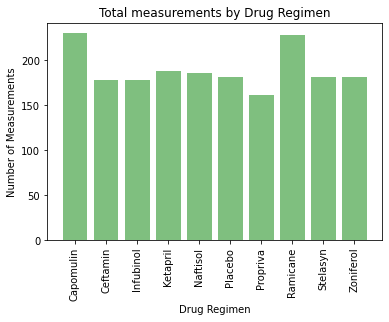

In [42]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
tot_measurements = combined_data_df.groupby("Drug Regimen").count()
x_axis = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
plt.bar(x_axis, tot_measurements["Mouse ID"], color='g', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation="vertical")
plt.title("Total measurements by Drug Regimen")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Regimen")

Text(0.5, 0, 'Drug Regimen')

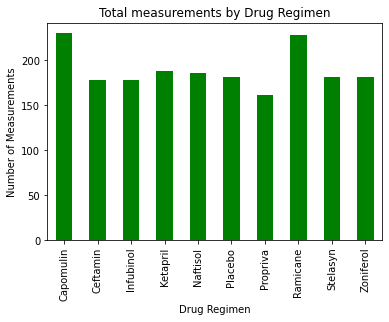

In [35]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
tot_measurements["Mouse ID"].plot(kind="bar", facecolor="green")
plt.title("Total measurements by Drug Regimen")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Regimen")

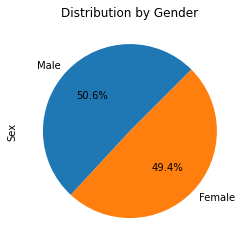

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = combined_data_df["Sex"].value_counts()
pie_plot = gender.plot.pie(autopct="%1.1f%%", startangle=45, title='Distribution by Gender')

Text(0.5, 1.0, 'Distribution by Gender')

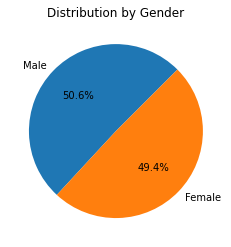

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, labels=gender.index.values, autopct="%1.1f%%", startangle=45)
plt.title('Distribution by Gender')

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
four_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0.5, 0, 'Timepoint')

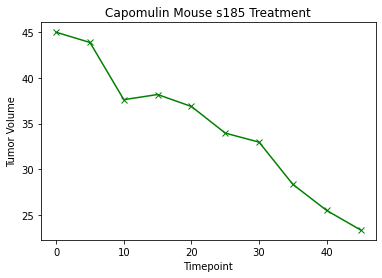

In [77]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185_df = combined_data_df.loc[combined_data_df["Mouse ID"] == "s185",:]
x_axis = s185_df["Timepoint"]
tumor_volume = s185_df["Tumor Volume (mm3)"]
plt.plot(x_axis, tumor_volume, marker="x", color="green")
plt.title("Capomulin Mouse s185 Treatment")
plt.ylabel("Tumor Volume")
plt.xlabel("Timepoint")

In [78]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = combined_data_df.loc[combined_data_df["Drug Regimen"] == "Capomulin",:]
avg_tumor_vol = capomulin_df.groupby(["Mouse ID"]).mean()
avg_tumor_vol

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
